# Exploratory Data Analysis on Dataset-Terrorism

# Author: Dimple Kaushik

# Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Loading dataset

In [2]:
df=pd.read_csv(r"D:\LGM\terror\Global Terrorism - START data\globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1",low_memory=False)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Data Insights

In [26]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,159944.000000,159944.000000,159944.000000,159944.000000,1.599440e+05,159944.000000,159944.000000,159944.000000
mean,2003.477761,6.487771,15.527503,23.702419,-5.087948e+02,2.093608,3.196775,5.290383
std,12.716774,3.387189,8.802178,18.302368,2.155025e+05,9.761575,36.510467,42.610286
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,11.840929,8.644191e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.558212,4.378420e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.621521,6.914701e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.shape

(181691, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Renaming the columns

In [7]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

# Checking null values

In [8]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             435
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           638
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [9]:
df = df.dropna()

# Visualization of Data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


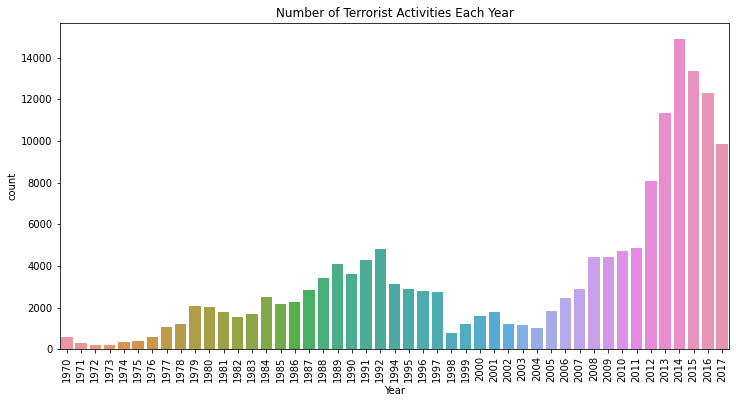

In [10]:
plt.subplots(figsize=(12,6))
sns.countplot('Year',data = df)
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Activities Each Year")
plt.show()

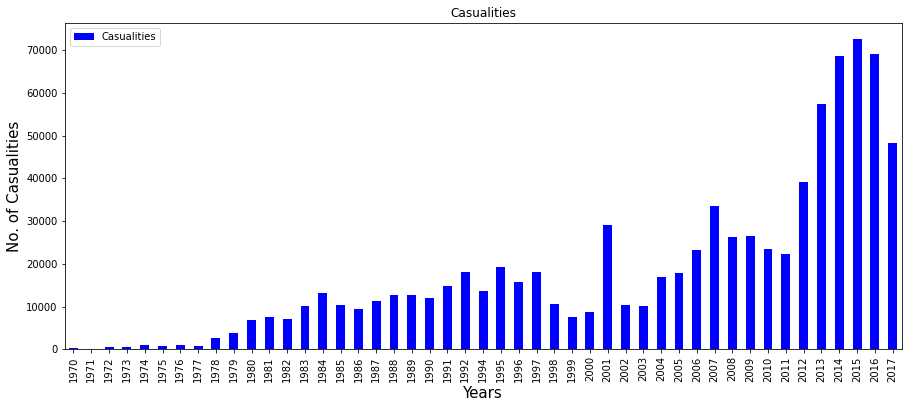

In [11]:
years= df[['Year','Casualities']].groupby('Year').sum()
years.plot(kind='bar',figsize=(15,6),color='blue')
plt.title("Casualities")
plt.xlabel('Years',fontsize=15)
plt.ylabel('No. of Casualities',fontsize=15)
plt.show()

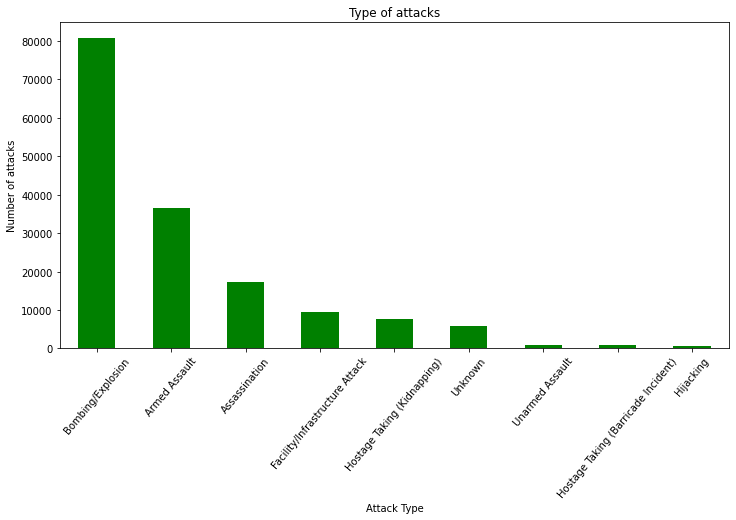

In [12]:
df['AttackType'].value_counts().plot(kind='bar',figsize= (12,6),color='green')
plt.xticks(rotation=50)
plt.xlabel('Attack Type')
plt.ylabel('Number of attacks')
plt.title('Type of attacks')
plt.show()

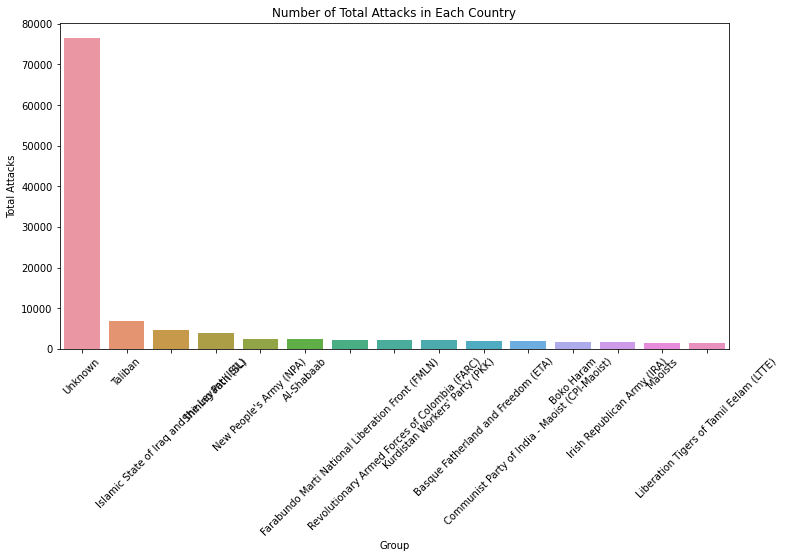

In [13]:
plt.subplots(figsize= (12,6))
country_attacks = df.Group.value_counts()[:15].reset_index()
country_attacks.columns = ['Group', 'Total Attacks']
sns.barplot(x = country_attacks.Group, y = country_attacks['Total Attacks'])
plt.xticks(rotation = 45)
plt.title("Number of Total Attacks in Each Country")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


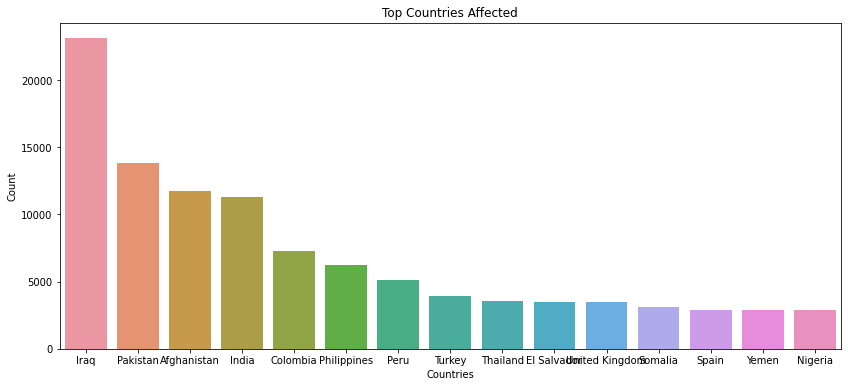

In [14]:
plt.subplots(figsize=(14,6))
sns.barplot(df['Country'].value_counts()[:15].index, df['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

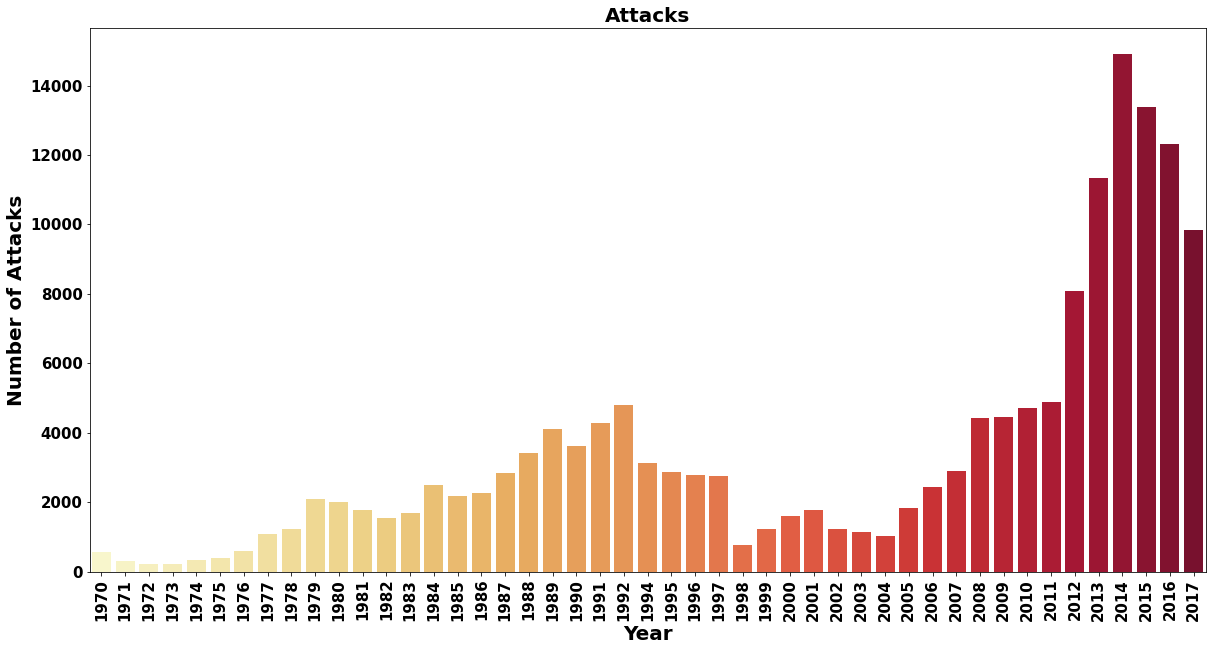

In [17]:
plt.figure(figsize=(20,10))
plt.title('Attacks',fontweight='bold',size=20)
sns.countplot(x= df.Year,palette="YlOrRd")
plt.xlabel("Year",fontsize=20,fontweight="bold")
plt.ylabel("Number of Attacks",fontsize=20,fontweight="bold")
plt.xticks(rotation=90,fontweight="bold",size=15)
plt.yticks(fontweight="bold",size=15)
plt.show()

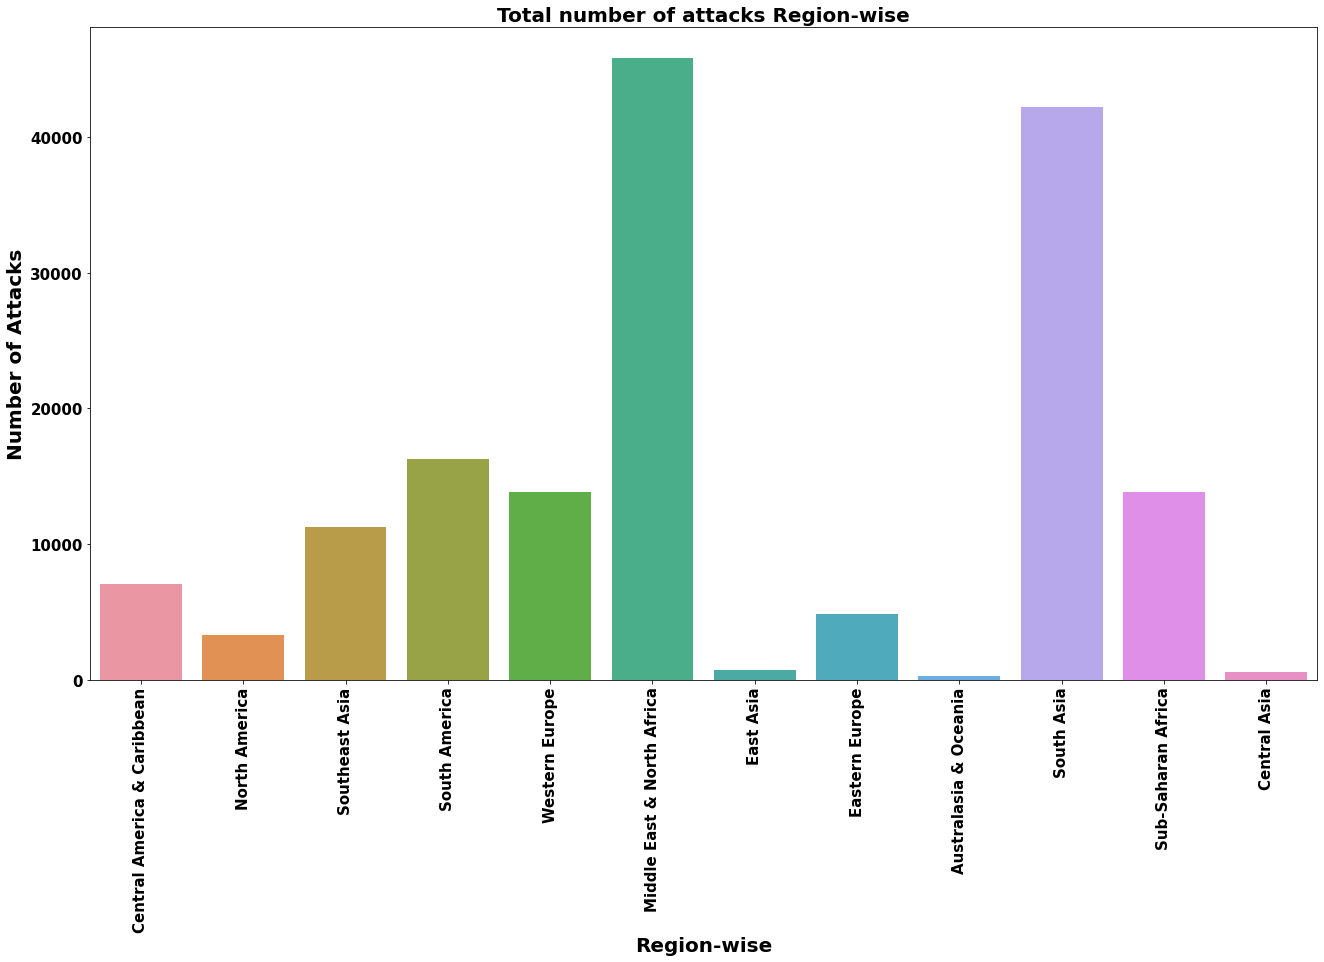

In [18]:
plt.figure(figsize=(22,12))
plt.title('Total number of attacks Region-wise',fontweight='bold',size=20)
sns.countplot(x= df.Region)
plt.xlabel("Region-wise",fontsize=20,fontweight="bold")
plt.ylabel("Number of Attacks",fontsize=20,fontweight="bold")
plt.xticks(rotation=90,fontweight="bold",size=15)
plt.yticks(fontweight="bold",size=15)
plt.show()

Middle East and North Africa followed by South Asia are the hot zones for terrorism.
Central Asia has least number of Terrorist Attacks

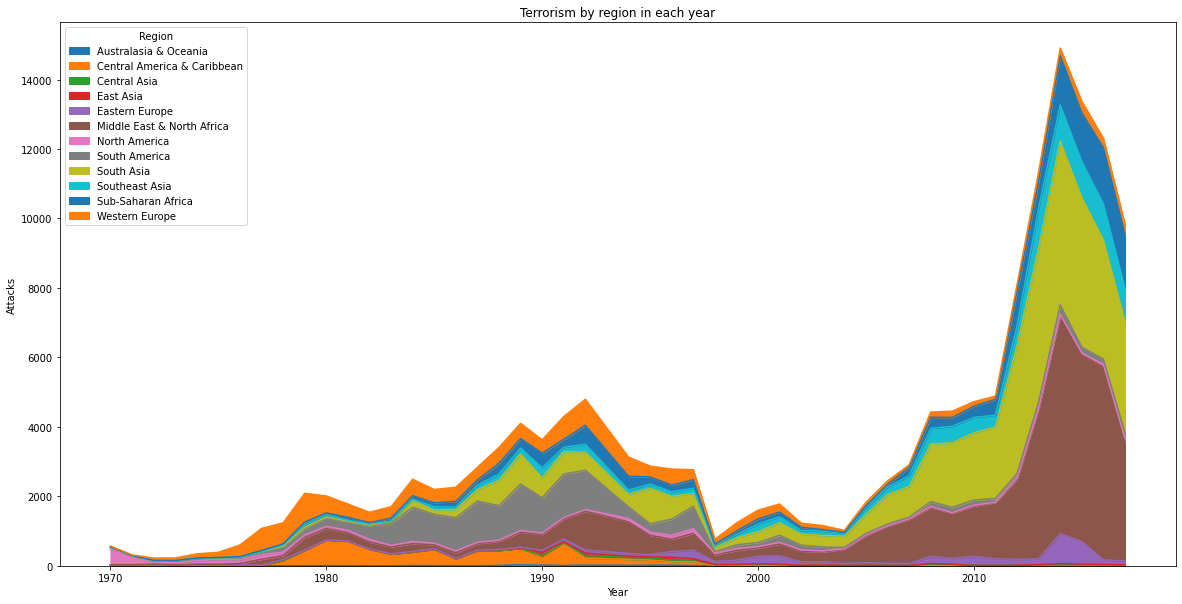

In [19]:
region= pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorism by region in each year')
plt.ylabel('Attacks')
plt.show()

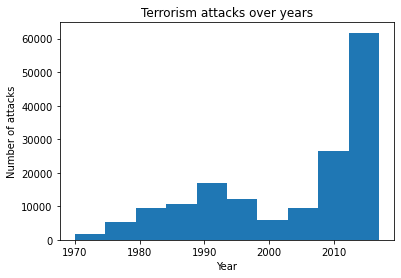

In [20]:
# Terrorism attacks over years

df['Year'].plot.hist() 
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Terrorism attacks over years')
plt.show()

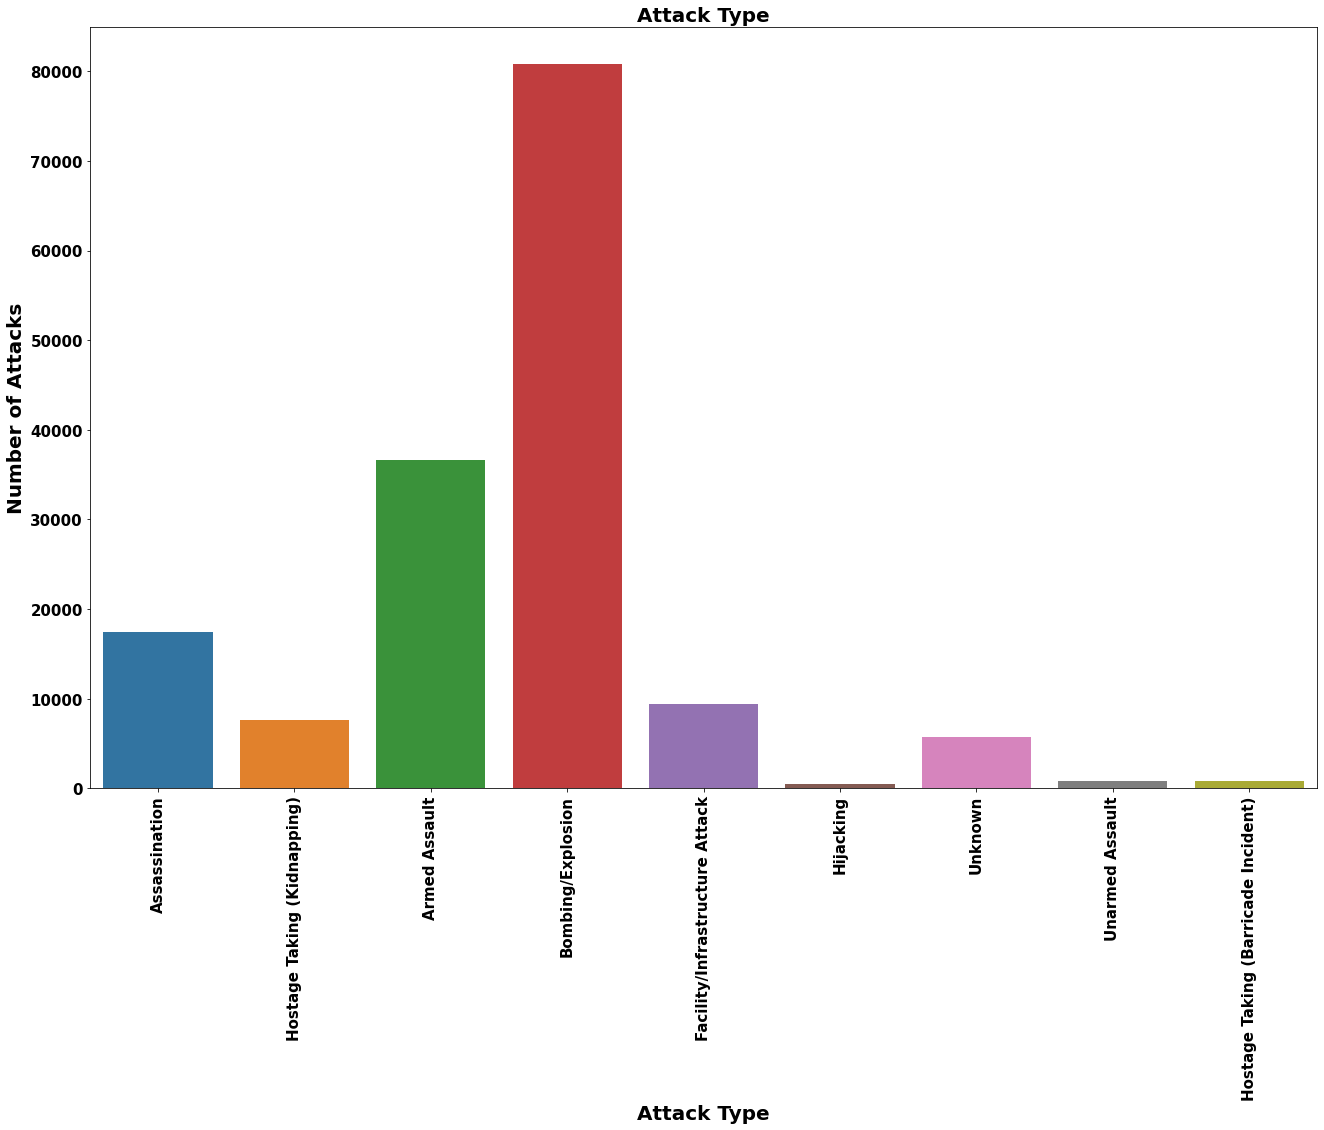

In [21]:
plt.figure(figsize=(22,14))
plt.title('Attack Type',fontweight='bold', size=20)
sns.countplot(x=df.AttackType)
plt.xlabel("Attack Type",fontsize=20,fontweight="bold")
plt.ylabel("Number of Attacks",fontsize=20,fontweight="bold")
plt.xticks(rotation=90,fontweight="bold",size=15)
plt.yticks(fontweight="bold",size=15)
plt.show()

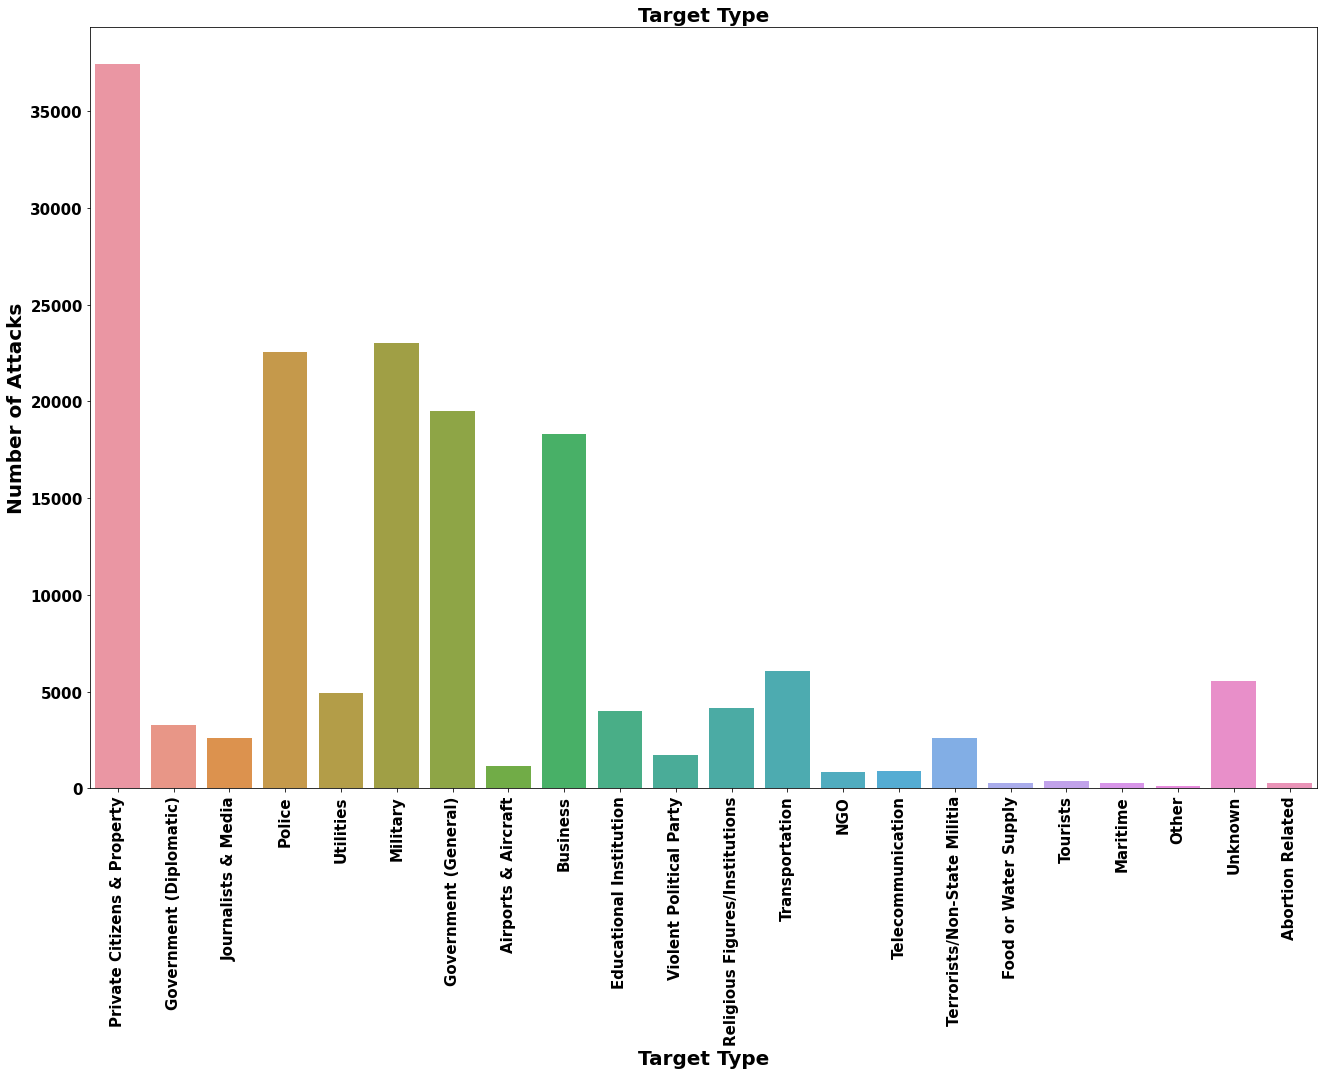

In [22]:
plt.figure(figsize=(22,14))
plt.title('Target Type',fontweight='bold',size=20)
sns.countplot(x= df.Target_type)
plt.xlabel("Target Type",fontsize=20,fontweight="bold")
plt.ylabel("Number of Attacks",fontsize=20,fontweight="bold")
plt.xticks(rotation=90,fontweight="bold",size=15)
plt.yticks(fontweight="bold",size=15)
plt.show()

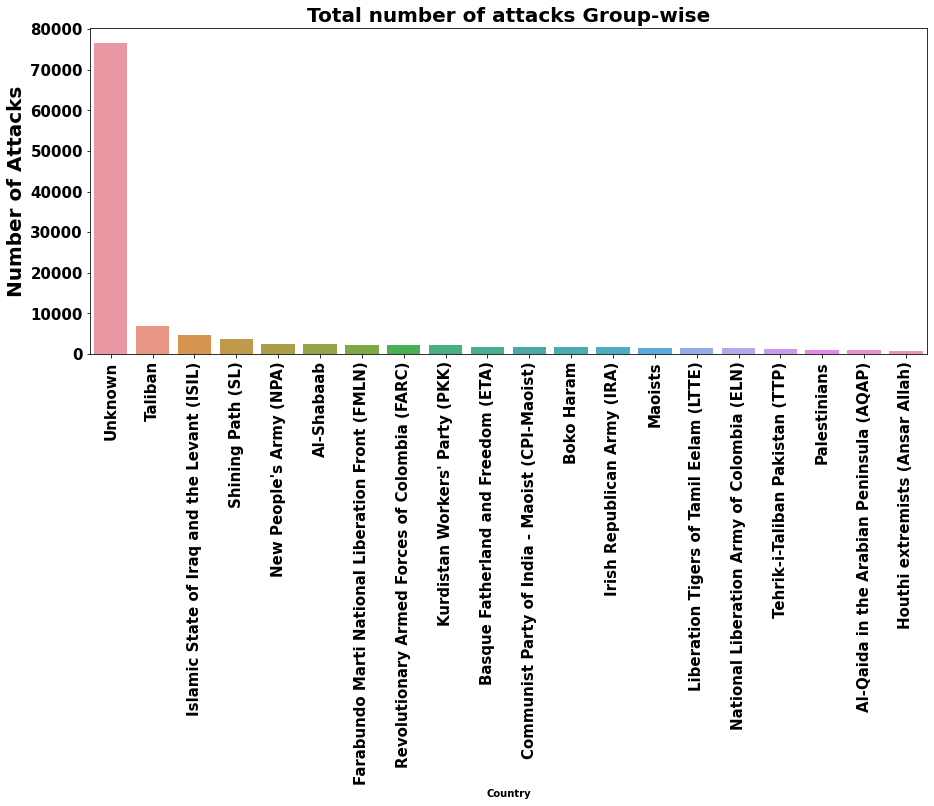

In [23]:
plt.figure(figsize=(15,6))
plt.title('Total number of attacks Group-wise',fontweight='bold',size=20)
sns.barplot(x= df['Group'].value_counts()[:20].index,y= df['Group'].value_counts()[:20].values)
plt.xlabel("Country",fontsize=10,fontweight="bold")
plt.ylabel("Number of Attacks",fontsize=20,fontweight="bold")
plt.xticks(rotation=90,fontweight="bold",size=15)
plt.yticks(fontweight="bold",size=15)
plt.show()

In [24]:
# Top 5 cities with highest terrorism attacks.

df['City'].value_counts().nlargest(6)

City
Baghdad      7352
Unknown      6724
Karachi      2565
Mosul        2110
Lima         2108
Mogadishu    1373
Name: count, dtype: int64

<Axes: xlabel='City'>

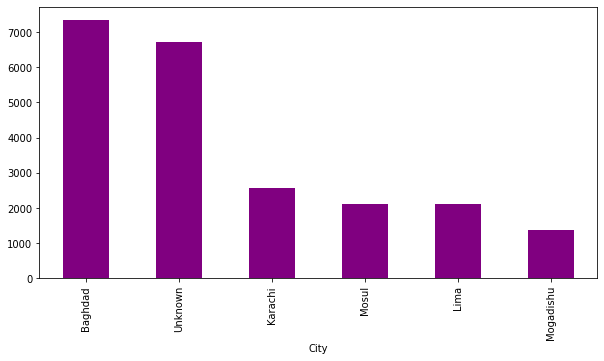

In [25]:
df['City'].value_counts().nlargest(6).plot(kind='bar', figsize=(10,5),color=['purple'])

# Top five cities with highest number of attacks are Baghdad,Karachi,Mosul,Belfast and Lima.

# Conclusion

The insights gathered from the dataset includes:

-Number of terrorist attacks increases rapidly after 2010. -Out of total terrorism attacks, very few attacks failed and almost all the terrorism attacks were successful. -Top five cities with highest number of attacks are Baghdad,Karachi,Mosul,Belfast and Lima. -Compare to all the other countries,number of terrorist attacks in Iraq is very high, followed by Pakistan, Afganistan, India ans so on. -Most targeted areas are private citizens and property , police and so on.